In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aug_train = pd.read_csv('aug_train.csv')
aug_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


#### Drop rows having 20% null values

In [3]:
null_rows = aug_train.isnull().sum(axis=1)/aug_train.shape[1]*100
null_rows

0        14.285714
1         0.000000
2        21.428571
3        21.428571
4         0.000000
           ...    
19153    14.285714
19154    14.285714
19155     0.000000
19156     7.142857
19157    28.571429
Length: 19158, dtype: float64

In [4]:
null_ind = null_rows[null_rows>20].index
null_ind

Index([    2,     3,     5,    10,    13,    14,    22,    25,    38,    39,
       ...
       19113, 19115, 19116, 19118, 19136, 19139, 19140, 19144, 19151, 19157],
      dtype='int64', length=2831)

In [5]:
c_aug_train = aug_train.drop(null_ind).reset_index(drop=True)
c_aug_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
3,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
4,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16322,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0
16323,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
16324,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
16325,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [6]:
aug_train_copy =aug_train.copy()
aug_train_copy

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Handling NULL Values

#### Imputation
- fillna = mostly used
- ffill
- bfill

In [ ]:
aug_train_copy.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
a = aug_train_copy.dropna(axis=1)
a

,enrollee_id,city,city_development_index,relevent_experience,training_hours,target
0,8949,city_103,0.920,Has relevent experience,36,1.0
1,29725,city_40,0.776,No relevent experience,47,0.0
2,11561,city_21,0.624,No relevent experience,83,0.0
3,33241,city_115,0.789,No relevent experience,52,1.0
4,666,city_162,0.767,Has relevent experience,8,0.0
...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,42,1.0
19154,31398,city_103,0.920,Has relevent experience,52,1.0
19155,24576,city_103,0.920,Has relevent experience,44,0.0
19156,5756,city_65,0.802,Has relevent experience,97,0.0


In [10]:
a.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
aug_train_copy.gender

0        Male
1        Male
2         NaN
3         NaN
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object

In [ ]:

aug_train_copy.gender.ffill()

0        Male
1        Male
2        Male
3        Male
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157    Male
Name: gender, Length: 19158, dtype: object

In [16]:
aug_train_copy.gender.bfill()

0        Male
1        Male
2        Male
3        Male
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object

In [21]:
aug_train_copy.gender.fillna('others')

0          Male
1          Male
2        others
3        others
4          Male
          ...  
19153      Male
19154      Male
19155      Male
19156      Male
19157    others
Name: gender, Length: 19158, dtype: object

In [22]:
aug_train['gender'].fillna('others')

0          Male
1          Male
2        others
3        others
4          Male
          ...  
19153      Male
19154      Male
19155      Male
19156      Male
19157    others
Name: gender, Length: 19158, dtype: object

- df.fillna({col:value}) :use incase of warning while using 'inplace = True '

In [24]:
aug_train_copy.fillna({'gender': 'others'}, inplace=True)

# using mode value for categorical imputaion

In [ ]:
aug_train_copy.enrolled_university.unique()   #checking unique value

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [26]:
aug_train_copy.enrolled_university.value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [28]:
enrolled_Uni= aug_train_copy.enrolled_university.mode()[0]
enrolled_Uni

'no_enrollment'

In [32]:
com_type = aug_train_copy.company_type.mode()[0]
com_type

'Pvt Ltd'

In [35]:
aug_train_copy.fillna({'enrolled_university': enrolled_Uni,'company_type': com_type},inplace = True)

In [36]:
aug_train_copy.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

- continuous  = countless Value
- categorical = can be counted easily

# For Continuous for imputation
- mean
- median

In [84]:
ipl = pd.read_csv("IPL Matches 2008-2020.csv")
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [85]:
ipl.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [86]:
res_mean = ipl.result_margin.mean()
res_mean

np.float64(17.321652065081352)

In [ ]:
res_median = ipl.result_margin.median()
res_median

In [101]:
ipl.result_margin = ipl.fillna({'result_margin': res_mean}, inplace=True)
ipl

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\3927923769.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ipl.result_margin = ipl.fillna({'result_margin': res_mean}, inplace=True)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,None,N,None,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,None,N,None,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,None,N,None,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,None,N,None,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,None,N,None,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,None,Y,None,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,None,N,None,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,None,N,None,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,None,N,None,PR Reiffel,S Ravi


## change data type

In [81]:
aug_train_copy.gender.unique()

array(['Male', 'others', 'Female', 'Other'], dtype=object)

In [83]:
aug_train_copy.gender = aug_train_copy.gender.astype('category')
aug_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             19158 non-null  int64   
 1   city                    19158 non-null  object  
 2   city_development_index  19158 non-null  float64 
 3   gender                  19158 non-null  category
 4   relevent_experience     19158 non-null  object  
 5   enrolled_university     19158 non-null  object  
 6   education_level         18698 non-null  object  
 7   major_discipline        16345 non-null  object  
 8   experience              19093 non-null  object  
 9   company_size            13220 non-null  object  
 10  company_type            19158 non-null  object  
 11  last_new_job            18735 non-null  object  
 12  training_hours          19158 non-null  int64   
 13  target                  19158 non-null  float64 
dtypes: category(1), float6

In [88]:
ipl.date =  pd.to_datetime(ipl.date)

In [89]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    0 non-null      object        
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [90]:
aug_train_copy.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,others,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,83,0.0


In [91]:
aug_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             19158 non-null  int64   
 1   city                    19158 non-null  object  
 2   city_development_index  19158 non-null  float64 
 3   gender                  19158 non-null  category
 4   relevent_experience     19158 non-null  object  
 5   enrolled_university     19158 non-null  object  
 6   education_level         18698 non-null  object  
 7   major_discipline        16345 non-null  object  
 8   experience              19093 non-null  object  
 9   company_size            13220 non-null  object  
 10  company_type            19158 non-null  object  
 11  last_new_job            18735 non-null  object  
 12  training_hours          19158 non-null  int64   
 13  target                  19158 non-null  float64 
dtypes: category(1), float6

In [92]:
aug_train_copy.target =aug_train_copy.target.astype('category')

In [93]:
aug_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             19158 non-null  int64   
 1   city                    19158 non-null  object  
 2   city_development_index  19158 non-null  float64 
 3   gender                  19158 non-null  category
 4   relevent_experience     19158 non-null  object  
 5   enrolled_university     19158 non-null  object  
 6   education_level         18698 non-null  object  
 7   major_discipline        16345 non-null  object  
 8   experience              19093 non-null  object  
 9   company_size            13220 non-null  object  
 10  company_type            19158 non-null  object  
 11  last_new_job            18735 non-null  object  
 12  training_hours          19158 non-null  int64   
 13  target                  19158 non-null  category
dtypes: category(2), float6

In [94]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    0 non-null      object        
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [95]:
ipl.method.unique()

array([nan, 'D/L'], dtype=object)

In [96]:
ipl.fillna({'method':'None','eliminator':'None'},inplace=True)

## Outiliers Handline
- data that have different pattern than others

-box plot

In [98]:
ipl.result_margin

0      None
1      None
2      None
3      None
4      None
       ... 
811    None
812    None
813    None
814    None
815    None
Name: result_margin, Length: 816, dtype: object

ValueError: List of boxplot statistics and `positions` values must have same the length

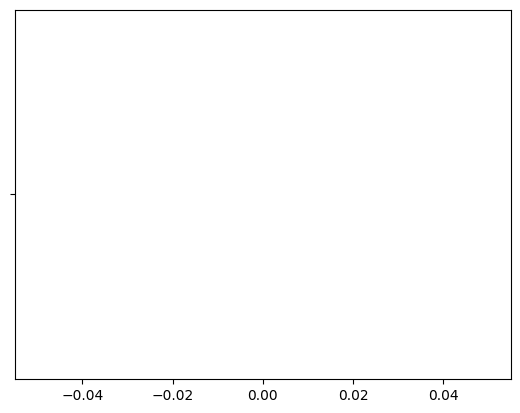

In [ ]:
sns.boxplot(ipl,x='result_margin') 


In [106]:
ipl.describe()


,id,date,neutral_venue
count,8.160000e+02,816,816.000000
mean,7.563496e+05,2014-04-13 19:07:03.529411840,0.094363
min,3.359820e+05,2008-04-18 00:00:00,0.000000
25%,5.012278e+05,2011-04-26 18:00:00,0.000000
50%,7.292980e+05,2014-04-23 12:00:00,0.000000
75%,1.082626e+06,2017-04-30 00:00:00,0.000000
max,1.237181e+06,2020-11-10 00:00:00,1.000000
std,3.058943e+05,NaN,0.292512


In [108]:
q1= ipl.result_margin.quantile(0.25)
q2= ipl.result_margin.quantile(0.5)
q3= ipl.result_margin.quantile(0.75)
print(q1,q2,q3)

nan nan nan


In [109]:
iqr = q3-q1
min_value = q1-1.5*iqr
max_value = q3+1.5*iqr
print(iqr,min_value,max_value)


nan nan nan


In [111]:
ipl[(ipl.result_margin>max_value)|(ipl.result_margin<min_value)].index

Index([], dtype='int64')

In [112]:
max_ind =  ipl[ipl.result_margin>max_value].index
max_ind

Index([], dtype='int64')

In [113]:
ipl.loc[max_value,'result_margin'] = max_value

ValueError: List of boxplot statistics and `positions` values must have same the length

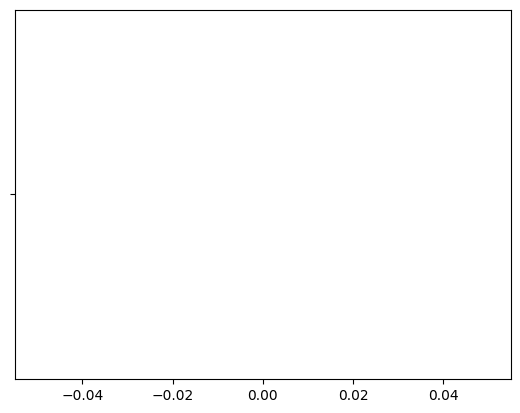

In [114]:
sns.boxplot(ipl,x='result_margin')

# HandlinG Duplicate Data

In [116]:
aug_train.duplicated().any()


np.False_

In [122]:
dup_ind = aug_train[aug_train.drop(columns='enrollee_id').duplicated()].index
dup_ind

Index([  250,  3924,  4078,  4212,  4649,  5554,  6292,  6851,  7108,  7253,
        7376,  7550,  7909,  7930,  7983,  8926, 10030, 10604, 11063, 12006,
       12076, 12457, 12685, 12874, 13057, 13767, 13823, 14064, 14743, 15174,
       15180, 15264, 15443, 15535, 15552, 15991, 16151, 17232, 17348, 17552,
       17555, 17894, 18218, 18388, 18721, 18758, 19019, 19056, 19143],
      dtype='int64')

In [ ]:
aug_train.drop_duplicates(inplace=True)   #Duplicate found at starting point

In [ ]:
aug_train.drop(dup_ind,inplace=True)    #Found after dropping some columns

In [127]:
aug_train.drop(columns='enrollee_id').duplicated().any()

np.False_